# **Init**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import plot,solveset
import math
from scipy.integrate import odeint,solve_bvp,solve_ivp
from matplotlib import animation,rc
import time

In [3]:
c1 = '#AAAAAA'
bgc = '#262626'
labc = '#CCCCCC'
clr = ['#88C1E0','#F0CB10','#D96B77','#4AD29E']

plt.rc('font', size = 15)          # ctrl plot default txt sizes
plt.rcParams['text.color'] = c1
plt.rcParams['xtick.color'] = c1
plt.rcParams['ytick.color'] = c1
plt.rcParams['axes.labelcolor'] = c1
plt.rcParams['axes.edgecolor'] = c1
plt.rcParams['axes.facecolor'] = bgc
plt.rcParams['figure.facecolor'] = bgc
plt.rcParams['patch.facecolor'] = bgc
plt.rcParams['savefig.facecolor'] = bgc
plt.rcParams['animation.html'] = 'jshtml'

plt.figure(figsize=(8,6), dpi=300)

<Figure size 2400x1800 with 0 Axes>

<Figure size 2400x1800 with 0 Axes>

# **Check the deriviation**

In [4]:
t = sp.symbols('t')
Vout = sp.symbols('Vout')
Rf = sp.symbols('Rf')
C = sp.symbols('C')
beta = sp.symbols('β')
Vo = sp.symbols('Vo')
Vp = sp.symbols('V+')
Vn = sp.Function('V-')('t')

print('Charging: ')
vout_1 = sp.Eq(Vout,Vo)
vp_1 = sp.Eq(Vp,beta*Vo)
display(vout_1,vp_1)

diffeq = sp.Eq((Vout-Vn)/Rf,C*Vn.diff(t))
print('\nV- equation: '); display(diffeq)
Vnsol= sp.dsolve(diffeq,ics={Vn.subs(t,0):-beta*Vo})
Vnsol = Vnsol.subs(Vout,Vo)
print('\nV- solution: '); display(Vnsol)

print('\n\nDischarging: ')
vout_2 = sp.Eq(Vout,-Vo)
vp_2 = sp.Eq(Vp,-beta*Vo)
display(vout_2,vp_2)

diffeq = sp.Eq((Vout-Vn)/Rf,C*Vn.diff(t))
print('\nV- equation: '); display(diffeq)
Vnsol= sp.dsolve(diffeq,ics={Vn.subs(t,0):beta*Vo})
Vnsol = Vnsol.subs(Vout,-Vo)
print('\nV- solution: '); display(Vnsol)

Charging: 


Eq(Vout, Vo)

Eq(V+, Vo*β)


V- equation: 


Eq((Vout - V-(t))/Rf, C*Derivative(V-(t), t))


V- solution: 


Eq(V-(t), Vo + (-Vo*β - Vo)*exp(-t/(C*Rf)))



Discharging: 


Eq(Vout, -Vo)

Eq(V+, -Vo*β)


V- equation: 


Eq((Vout - V-(t))/Rf, C*Derivative(V-(t), t))


V- solution: 


Eq(V-(t), -Vo + (Vo*β + Vo)*exp(-t/(C*Rf)))

#**Consts & Vars**
Assume $ln(\frac{1+\beta}{1-\beta})=1$
<br><br>
$⇒ T=2R_fC $ 

In [7]:
R = 5e4 #50k
C = 1e-7  #100nF
T = 2*R*C
Vo = 8
b = (np.exp(1)-1)/(np.exp(1)+1)

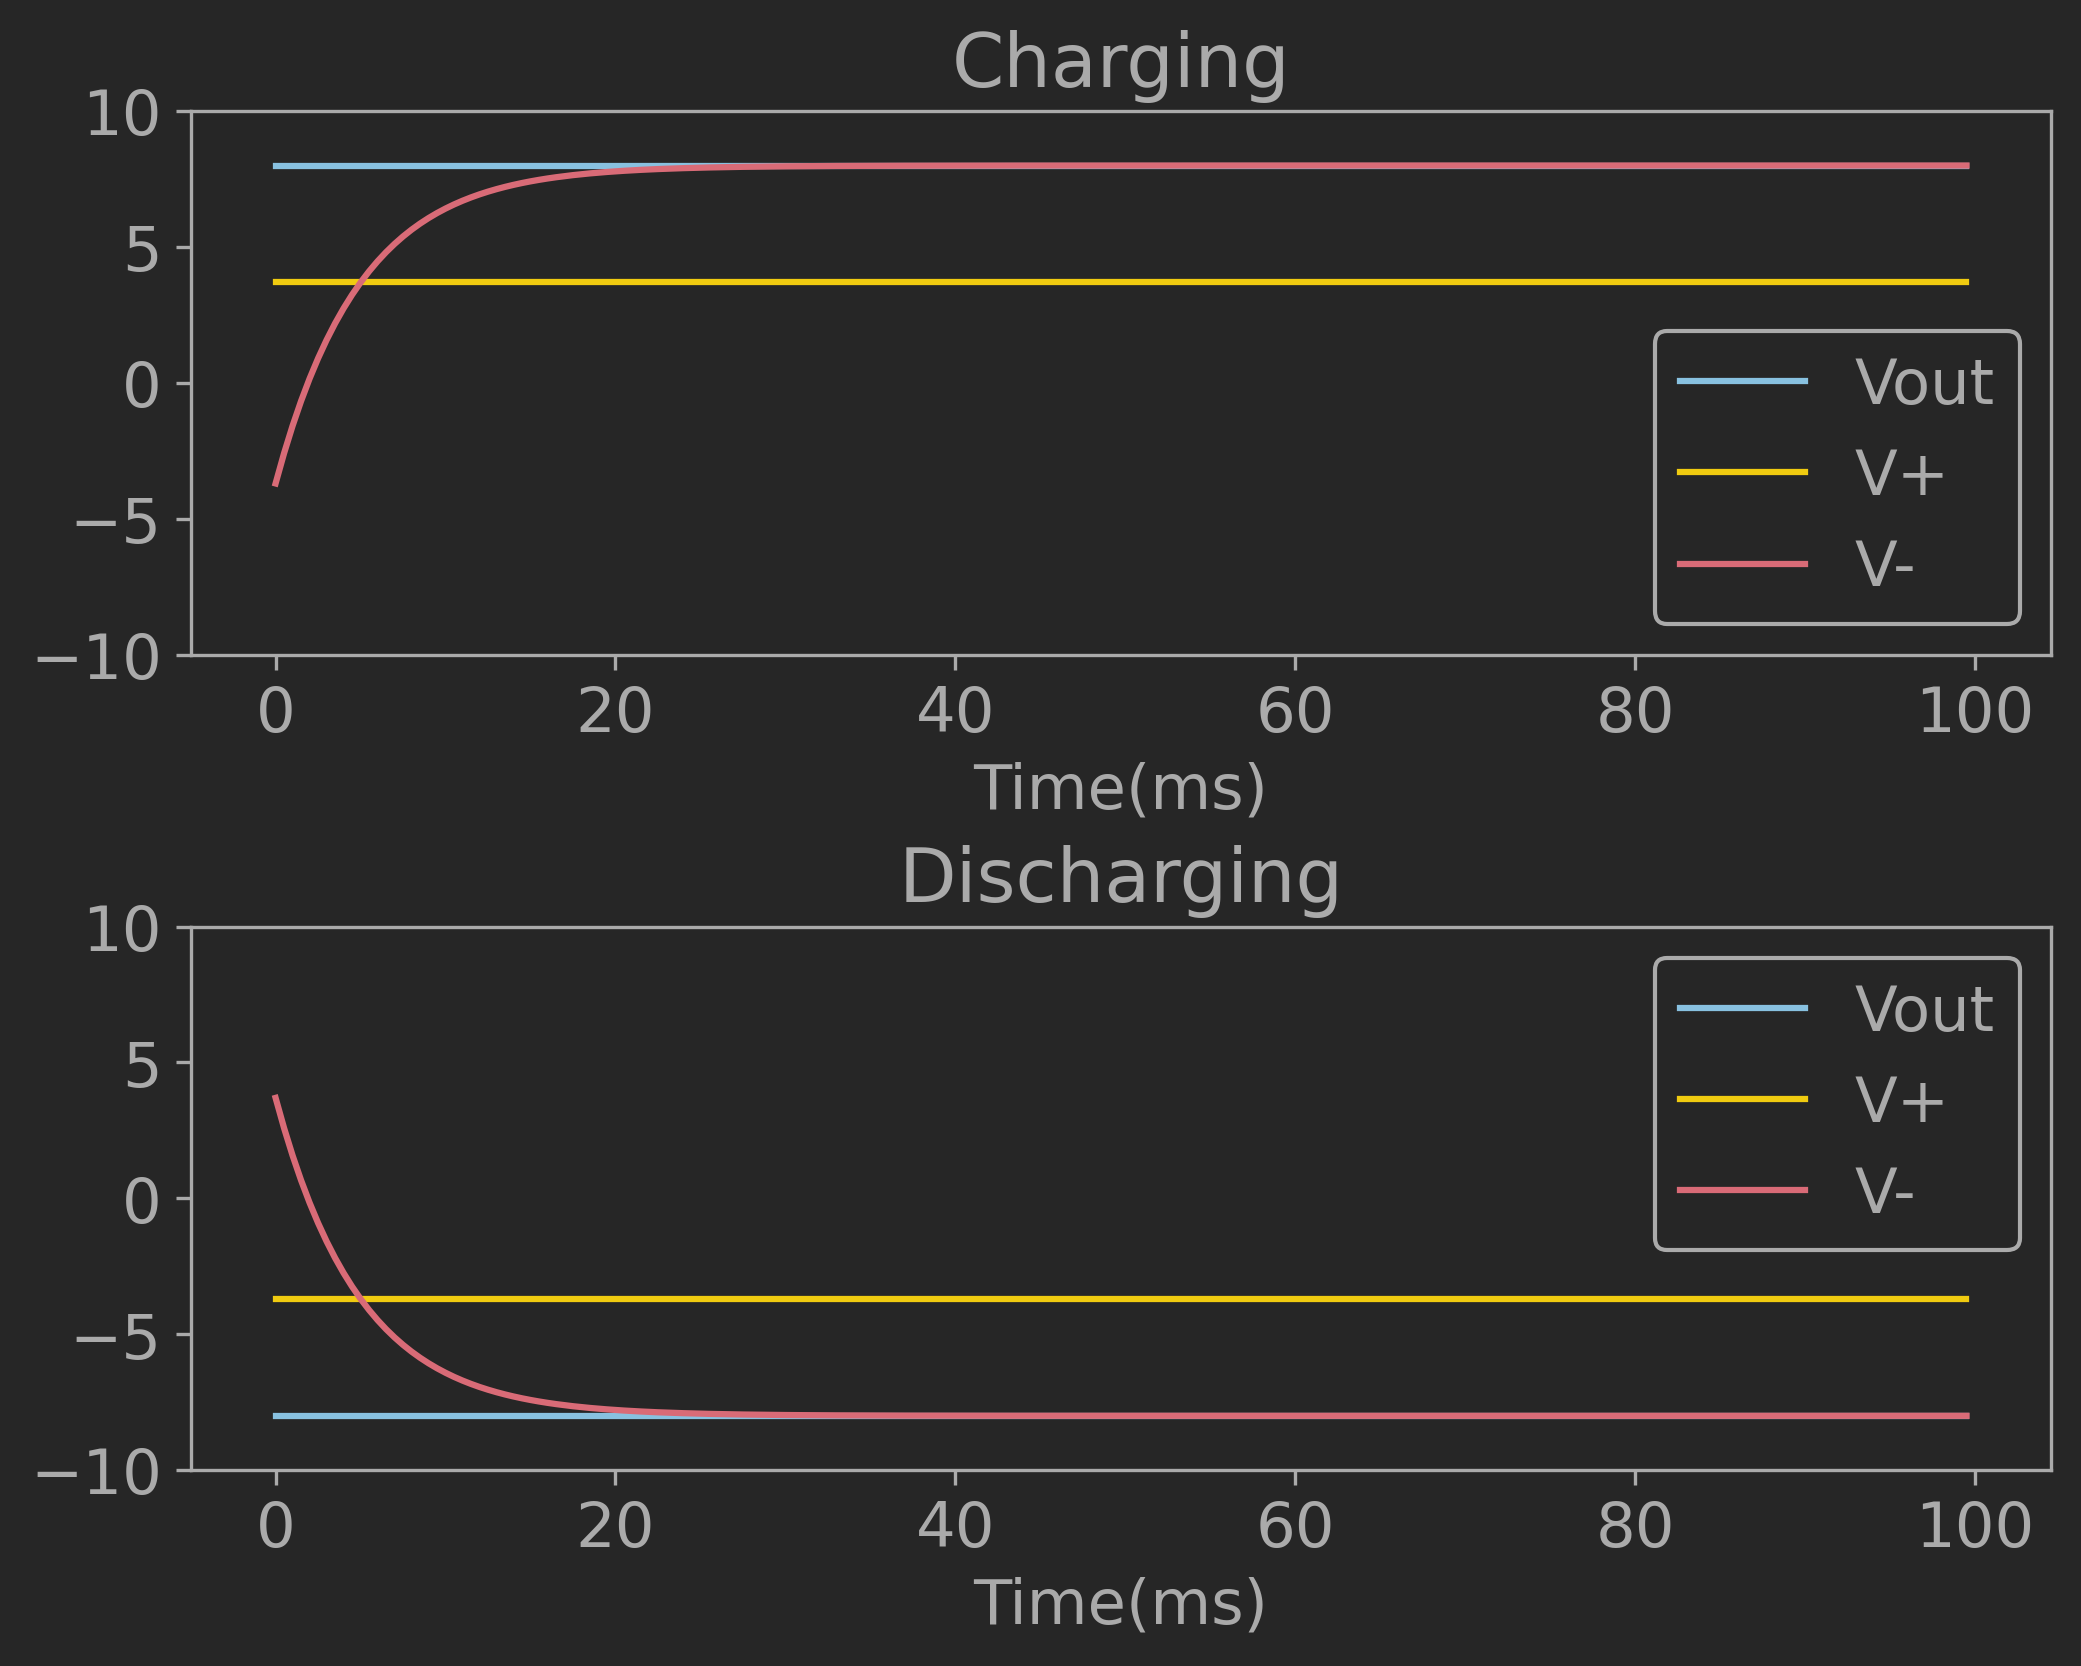

In [30]:
plt.figure(figsize=(8,6), dpi=300)

time = np.arange(0,0.1,0.0005)
tms = 1000*time
vout_1 = Vo*np.linspace(1,1,len(time))
vp_1 = b*vout_1
vn_1 = Vo-((1+b)*Vo*np.exp(-time/(T/2)))
ax0 = plt.subplot2grid((2,3),(0,0),colspan=3)
ax0.plot(tms,vout_1,label='Vout',color=clr[0])
ax0.plot(tms,vp_1,label='V+',color=clr[1])
ax0.plot(tms,vn_1,label='V-',color=clr[2])
plt.title('Charging')
plt.ylim(-Vo-2,Vo+2)
plt.xlabel('Time(ms)')
plt.legend()

vout_2 = -Vo*np.linspace(1,1,len(time))
vp_2 = b*vout_2
vn_2 = -Vo+(1+b)*Vo*np.exp(-time/(T/2))
ax1 = plt.subplot2grid((2,3),(1,0),colspan=3)
ax1.plot(tms,vout_2,label='Vout',color=clr[0])
ax1.plot(tms,vp_2,label='V+',color=clr[1])
ax1.plot(tms,vn_2,label='V-',color=clr[2])
plt.title('Discharging')
#plt.xlim(0,100)
plt.ylim(-Vo-2,Vo+2)
plt.xlabel('Time(ms)')
plt.legend()
plt.subplots_adjust(hspace=0.5)

plt.show()

# **Define the Models**
$$ Vout(t+nT)=\left\{
\begin{align*}
& -V_o, \quad 0<t-nT< \frac {T} {2} \\
& V_o, \quad \frac T 2<t-nT<T \\
\end{align*}
\right.
$$ \
$$ V_+(t+nT)=\left\{
\begin{align*}
& -βV_o, \quad 0<t-nT<\frac {T} {2} \\
& βV_o, \quad \frac T 2<t-nT<T \\
\end{align*}
\right.
$$ \
$$ V_-(t+nT)=\left\{
\begin{align*}
& V_o-(1+β)V_oe^{\frac {-t} {R_fC}} , \quad 0<t-nT<\frac {T} {2} \\
& -V_o+(1+β)V_oe^{\frac {-(t-\frac{T}{2})} {R_fC}}, \quad \frac T 2<t-nT<T \\
\end{align*}
\right.
$$


In [ ]:
#Vout
def Vout(t):
  hT = T/2
  t = t%T
  if t>hT :
    return Vo
  else:
    return -Vo

#V+
def Vp(t):
  hT = T/2
  t = t%T
  if t>hT :
    return b*Vo
  else:
    return -b*Vo

#V-
def Vn(t):
  hT = T/2
  t = t % T
  if t>hT :
    t-=hT 
    ans = Vo - (1+b)*Vo*np.exp(-t/(R*C))
  else:
    ans = -Vo + (1+b)*Vo*np.exp(-t/(R*C))
  return ans

# **Sampling**

In [ ]:
#sampling number
spn = 2000
time = np.linspace(0,0.1,spn)
tms = np.linspace(0,100,spn)

Voutd = []
Vpd = []
Vnd = []

for i in time :
  Voutd.append(Vout(i))
  Vpd.append(Vp(i))
  Vnd.append(Vn(i))

Tags = ['Vout','V+','V-']
Data = np.array([np.array(Voutd),np.array(Vpd),np.array(Vnd)])
terms = 3

#**Plot**

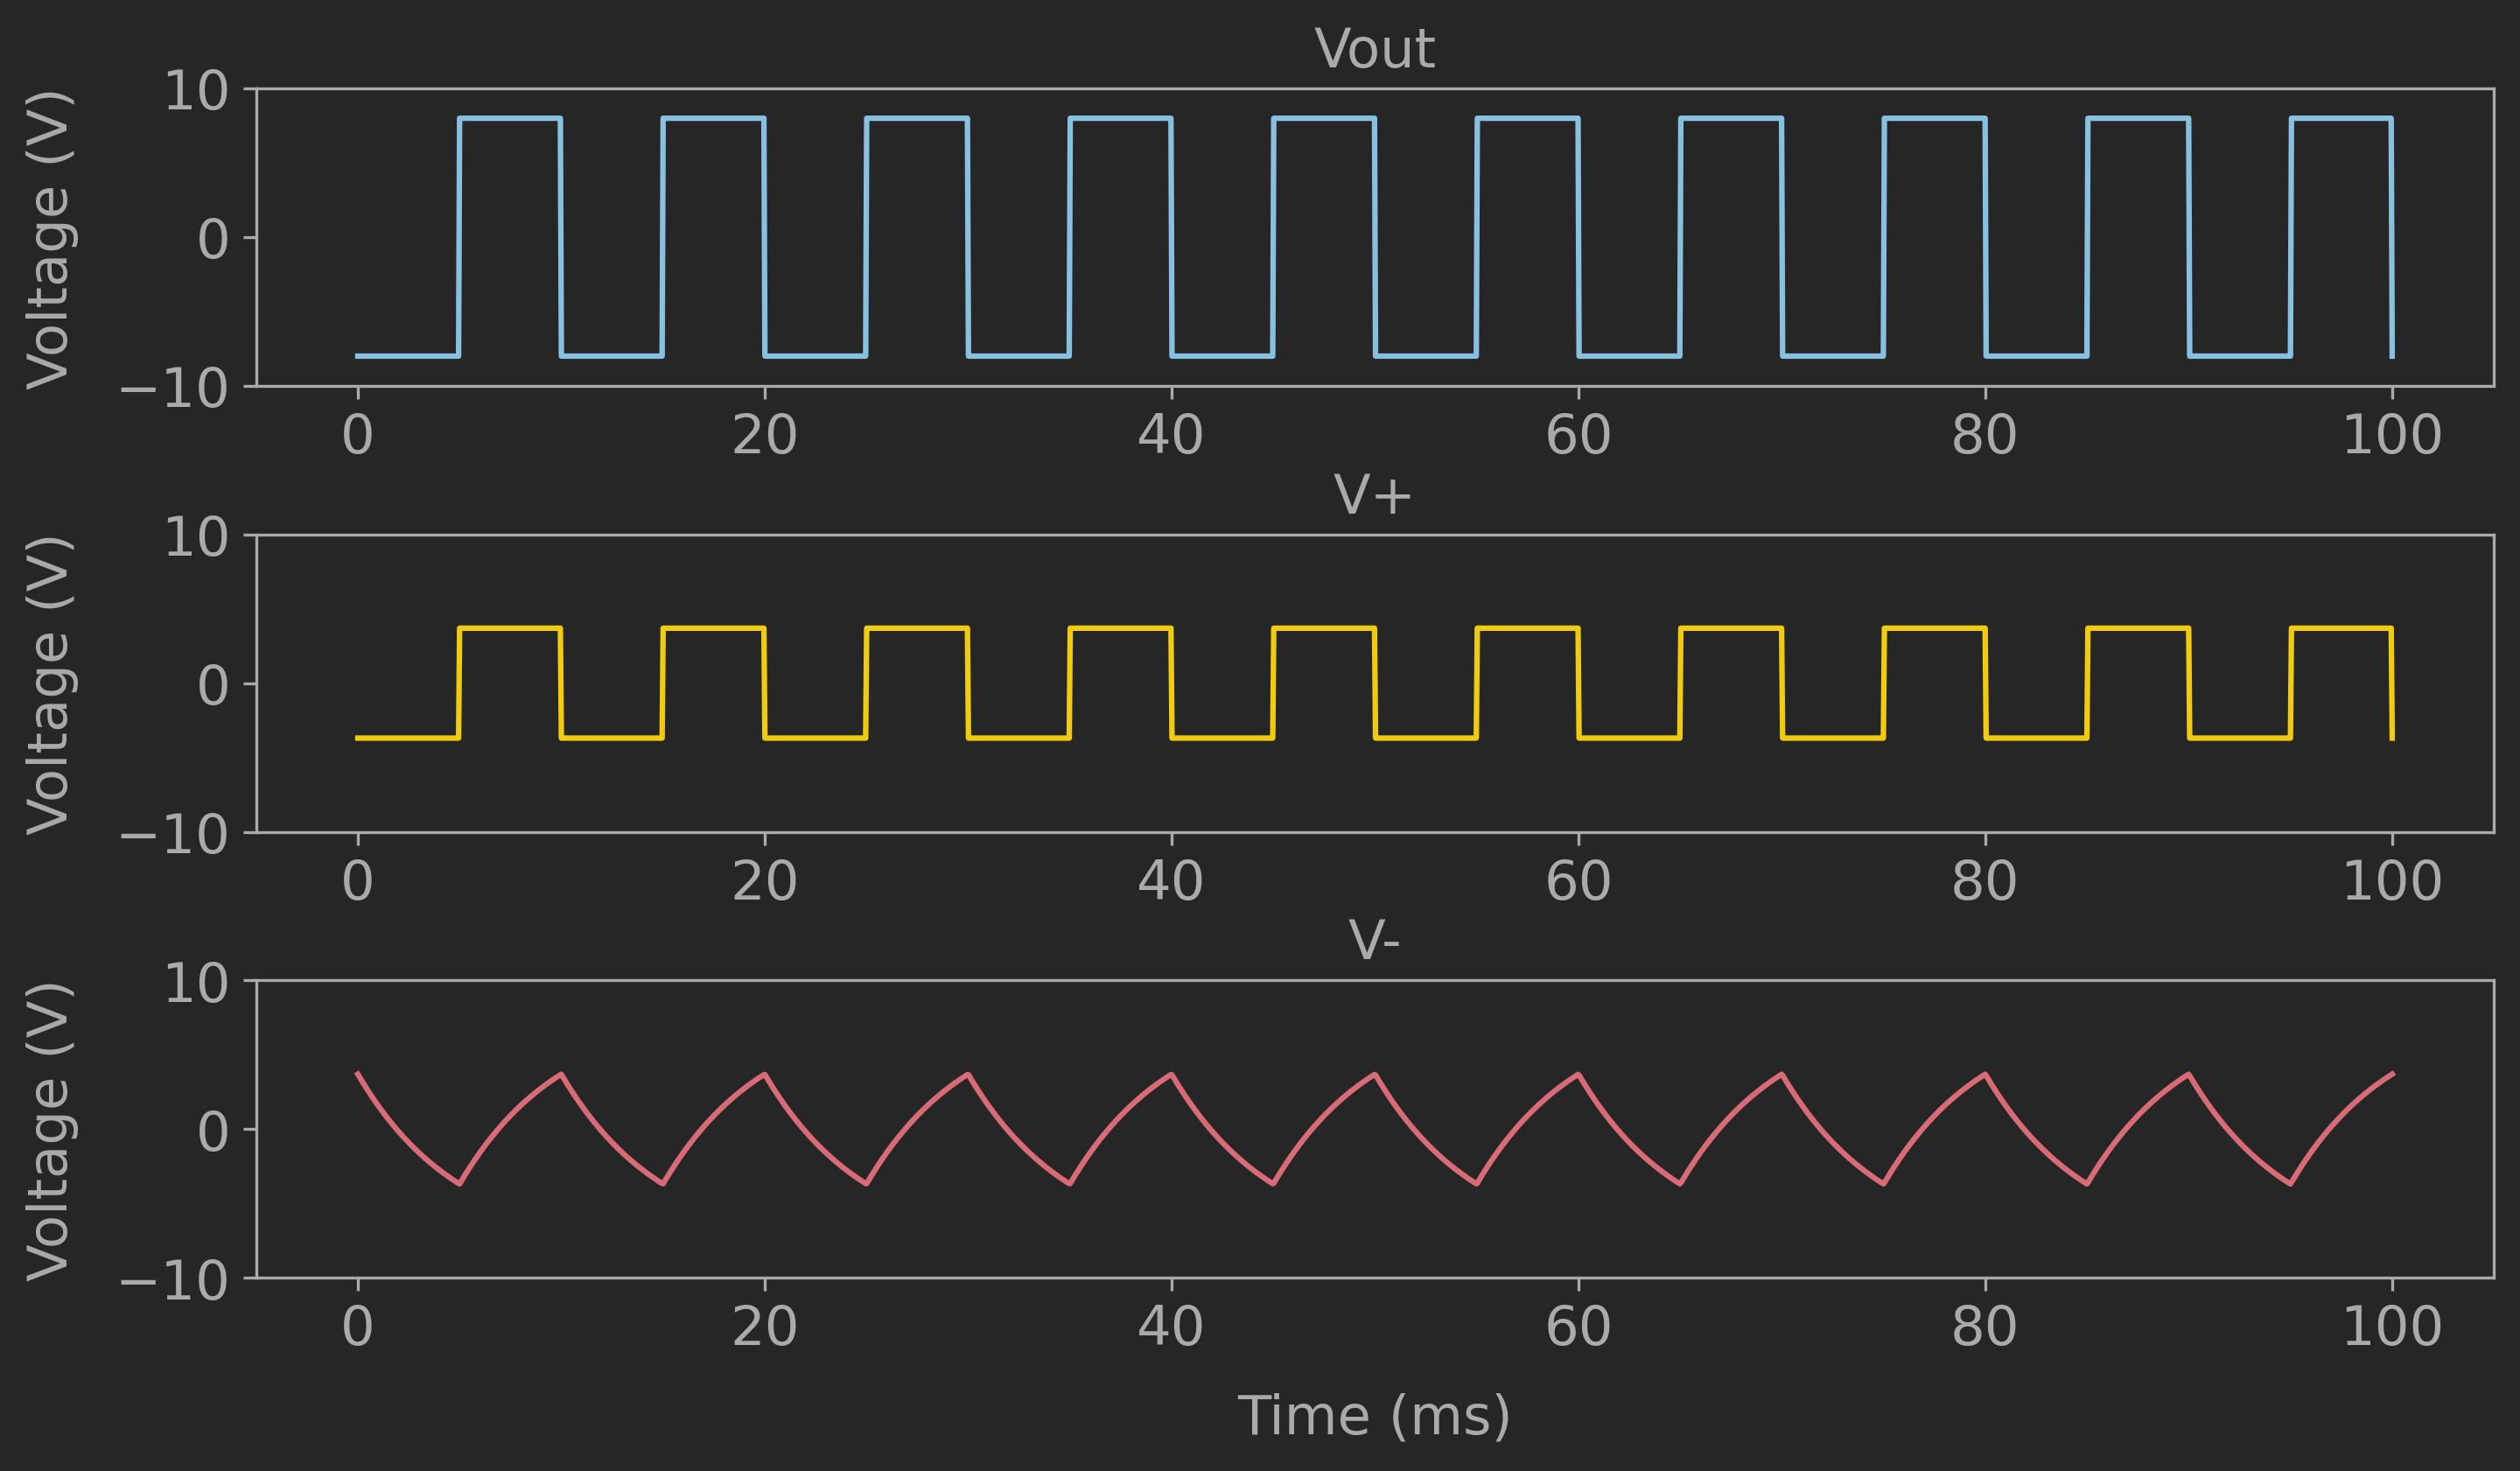

In [ ]:
plt.figure(figsize=(11,6), dpi=300)

for i in range(terms):
  plt.subplot(3,1,i+1)
  plt.title(Tags[i],fontsize = 15)
  plt.ylabel('Voltage (V)',labelpad=10)
  plt.ylim(-Vo-2,Vo+2)
  plt.plot(tms,Data[i],color = clr[i])
  count += 1

plt.xlabel('Time (ms)',labelpad=10)
plt.subplots_adjust(hspace=0.5)
plt.show()

#**Animation**

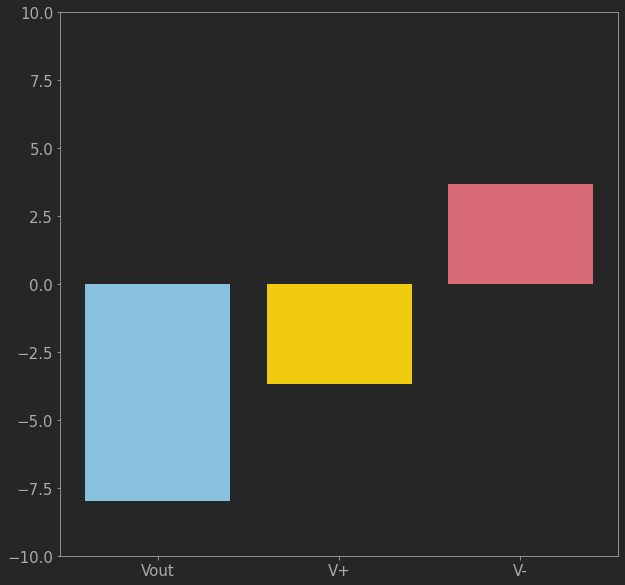

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(10,10))
plt.ylim(-10,10)

Data_=[[],[],[]]
for i in range(terms):
  for j in range(spn):
    if j%4==0 :
      Data_[i].append(Data[i][j])


def update(j):
  plt.cla()
  plt.ylim(-10,10)
  for i in range(0,terms):
    axes.bar(Tags[i],Data_[i][j],align='center',color=clr[i])

ani=animation.FuncAnimation(fig, update ,frames=300,interval=20)
writervideo = animation.FFMpegWriter(fps = 50)
ani.save('/content/drive/MyDrive/Class/ODE/Ani2.mp4', writer=writervideo,dpi = 300)
ani